In [2]:
#importing essentiaL libraries for the implementation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [3]:
#loading csv file
df=pd.read_csv('C://Users//Bhavesh//salary2.csv')
df=df.dropna()
df.head()

,Name,Age,Income($)
1,Rob,27.0,70000.0
3,Michael,29.0,90000.0
5,Mohan,29.0,61000.0
7,Ismail,28.0,60000.0
9,Kory,42.0,150000.0


Text(0, 0.5, 'income')

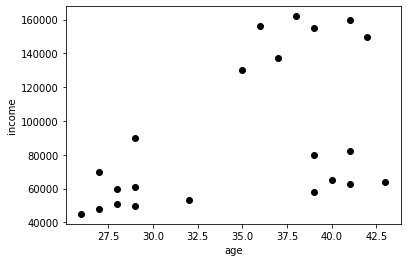

In [7]:
#visualizing the above data for better reach
plt.scatter(df['Age'],df['Income($)'],color='black')
plt.xlabel('age')
plt.ylabel('income')

In [8]:
#from analysing above graph shows that there could be 3 clusters
#creating function for k means clustering
km=KMeans(n_clusters=3)

In [11]:
#In this function we can do both fit and predict at the same time and storing it in ypredicted variable
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [37]:
#now we create cluster in df and add to the original dataframe
df['cluster'] = y_predicted
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1])

In [13]:
#cluster points
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [14]:
#now visualizing the three different dataframe as of different cluster
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [16]:
df2.head()

,Name,Age,Income($),cluster
9,Kory,42.0,150000.0,1
11,Gautam,39.0,155000.0,1
13,David,41.0,160000.0,1
15,Andrea,38.0,162000.0,1
17,Brad,36.0,156000.0,1


No handles with labels found to put in legend.


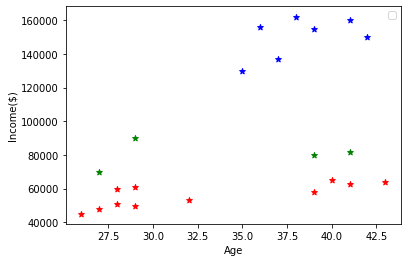

In [27]:
#visualizing the different dataframes
plt.scatter(df1['Age'],df1['Income($)'],color='red',marker='*')
plt.scatter(df2['Age'],df2['Income($)'],color='blue',marker='*')
plt.scatter(df3['Age'],df3['Income($)'],color='green',marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [52]:
#in above graph we can see that the cluster formed are in approprite  it is due to the inapproprite scaling
#this can be resolve by Minmaxscaler for making approprite scaling
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [53]:
df.head()

,Name,Age,Income($),cluster
1,Rob,0.058824,0.213675,1
3,Michael,0.176471,0.384615,1
5,Mohan,0.176471,0.136752,1
7,Ismail,0.117647,0.128205,1
9,Kory,0.941176,0.897436,0


In [54]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [49]:
df['cluster']=y2_predicted

In [55]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
1,Rob,0.058824,0.213675,1
3,Michael,0.176471,0.384615,1
5,Mohan,0.176471,0.136752,1
7,Ismail,0.117647,0.128205,1
9,Kory,0.941176,0.897436,0


In [56]:


km.cluster_centers_



array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

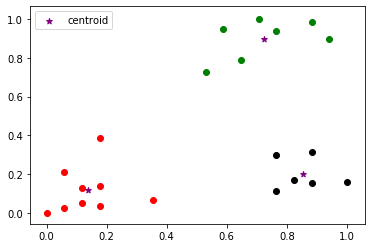

In [57]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [62]:
#now we will findout how to bringout k when feature are more the 5 in real worl scenerip
#this can be done Elbow method/algorithm
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [63]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.21055478995472487,
 0.16858512236029755,
 0.13276619319783187,
 0.10497488680620905]

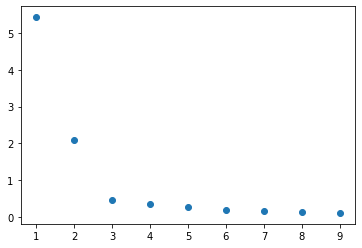

In [64]:
plt.scatter(k_rng,sse)

In [65]:
#from above plot we can find out that the 3 is been optimum number or k

In [66]:
#excercise for better reach 
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [72]:
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris=df_iris.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


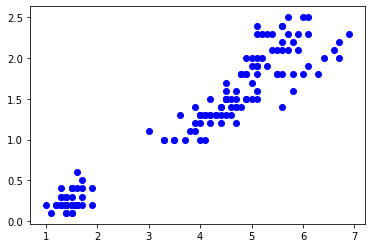

In [76]:
#visualizing it
plt.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'],color='blue')

In [91]:
km = KMeans(n_clusters=3)
iris_predicted=km.fit_predict(df_iris[['petal length (cm)']],df_iris[['petal width (cm)']])
iris_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
df_iris['cluster']=iris_predicted
df_iris.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [ ]:
df

In [93]:
#as from predicted cluster we can see that there are 8 cluster i feel it inappropriate
#so i will scale it properly and i will use elbow method to find out k
#scaling for petal lenght
scaler.fit(df_iris[['petal length (cm)']])
df_iris['petal length (cm)']=scaler.transform(df_iris[['petal length (cm)']])
#scaling for petal width
scaler.fit(df_iris[['petal width (cm)']])
df_iris['petal width (cm)']=scaler.transform(df_iris[['petal width (cm)']])
df_iris.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


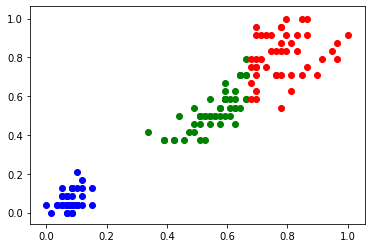

In [99]:
df1 = df_iris[df_iris.cluster==0]
df2 = df_iris[df_iris.cluster==1]
df3 = df_iris[df_iris.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')

In [102]:
#now finding out the cluster using elbow method
sse_iris=[]
k_rng1=range(1,10)
for k in k_rng1:
    km.fit(df_iris)
    sse_iris.append(km.inertia_)
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [103]:
sse_iris

[1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737,
 1.9730176624764737]

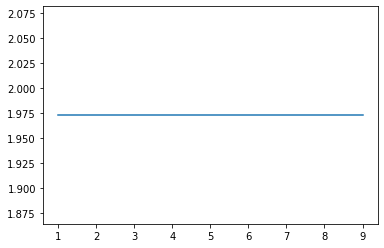

In [104]:
plt.plot(k_rng1,sse_iris)